<a href="https://colab.research.google.com/github/NinelK/SA_DS_tutorial/blob/main/DS_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial:** Dynamical systems in neuroscience

## Introduction

Dynamical systems are systems that **evolve** in time. These can be physical systems, economic systems, neurons, neural networks or the whole brain. No matter what the system is, the universal dynamical system framework can help us understand its time-dependent behavior.

When modelling dynamics, we can represent time in two different ways: *discrete* or *continuous*. In both cases, we can write down the evolution of the system as a function of its previous `state' $\mathbf{x}$ and external inputs that the system receives $\mathbf{u}$:

Discrete time systems               |           Continuous time systems
------------------------------------|-------------------------------------
 $$\mathbf{x}_{t+1} = F_d(\mathbf{x}_t,\mathbf{u}_t)$$           |    $$\frac{d\mathbf{x}(t)}{dt} = F_c(\mathbf{x}(t),\mathbf{u}(t))$$
 
*Notation:* The variables in **bold** here correspond to vectors, e.g. $\mathbf{x} = (x_1,x_2,\ldots,x_n)^T$.

Here, the state $\mathbf{x}$ can, for instance, correspont to neural firing. In discrete case, $\mathbf{x}_t$ would be the number of spikes emmited within one time bin, while $\mathbf{x}(t)$ could be a function which is only non-zero at spike times.
External inputs $\mathbf{u}$ in this case would correspond to the inputs from other neurons.

The key part of the dynamical systems framework is the **evolution operator** $F$. Whether continuous $F_c$ or discrete $F_d$, it can tell us a lot about the system:
> The power of the dynamical systems approach to neuroscience, as well as to many other sciences, is that we can tell something, or many things, about a system without knowing all the details that govern the system evolution. We do not even use equations to do that! Some may even wonder why we call it a mathematical theory.        *Eugene Izhikevich [1]*

Therefore, the main goal of the tutorial is to learn how to tell something about the dynamical system knowing $F$.

# Part 1: Autonomous linear dynamical systems

Sometimes, we can assume that the system does not receive any external inputs and evolves in time on its own ( $u(t)=0$ ). Such dynamical systems are called **autonomous**. Autonomous systems are common in physics, but also surprisingly applicable to some biological neural networks, as we will see in the last part of the tutorial. Lack of external inputs greatly simplifies the analysis of the dynamics $F$, so let us assume **no** external inputs for now.

As a warmup, let us start with a 1D autonomous continuous-time dynamical system:

$\frac{dx}{dt} = \dot x = a x; \qquad x(0) = x_0 \tag{1} $

We are looking at a so-called *initial value problem* here: we know the state of the system $x_0$ at $t=0$, but we want to make a forcast into the future and find $x(t)$ for $t>0$.

## **Exercise 1:** Solving a 1D linear dynamics equation
Let us solve equation (1) both numerically and analytically.

For numerical integration, we will use the *forward Euler* scheme:

$$\frac{dx}{dt} \approx \frac{\Delta x}{\Delta t} = \frac{x_{n+1} - x_n}{\Delta t} \tag{2}$$

Complete the missing lines in the code below. Does analytical solution match the numerical solution? 

In [3]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets       # interactive display
from matplotlib import rcParams
rcParams.update({'font.size': 18})

def analytical_1D_solution(x0,a,t):
  ''' Finds a solution of x' = ax, for x(t), given x(0) = x0 '''
  xt = x0 * np.exp(a*t) # 2remove
  return xt

def numerical_1D_solution(x0,a,t,dt=0.001):
  ''' Integrates x' = ax using a forward Euler scheme, given x(0) = x0;
  Returns x(t) '''
  N = int(t//dt) # number of integration steps #2remove
  xn = x0 # current value of x_n
  for n in range(N):
    x_n_plus_1 = xn + a*xn*dt # write a discretized update rule following (1-2) #2remove
    xn = x_n_plus_1  
  return xn

T = 1 # total duration
n_plot = 10 # how many points to plot

@widgets.interact
def plot_1D_solutions(x0 = 1., 
                      a = widgets.FloatSlider(min=-2., max=2., step=1, value=1),
                      dt = widgets.FloatLogSlider(min=-3, max=-1, value=.01)):
  a = a if type(a)==float else a.value
  dt = dt if type(dt)==float else dt.value
  plt.figure()
  time = np.linspace(0,T,n_plot)
  plt.plot(time, [analytical_1D_solution(x0,a,t) for t in time],label='Analytical solution')
  plt.plot(time, [numerical_1D_solution(x0,a,t,dt) for t in time],label='Numerical solution')
  plt.xlim([0,T])
  plt.ylim([-5,5])
  plt.axhline(0,c='k',linestyle=':')
  plt.xlabel('time')
  plt.ylabel('state x')
  plt.legend()


interactive(children=(FloatSlider(value=1.0, description='x0', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

When do the solutions agree? Disagree? Why?

How many qualitatively different solutions have you found? What are they?

ADD SOLUTION

### Exercise 1a: What is $a$ is complex-valued?

In the exercise 1 we found that analytical solution is:
$$x(t) = x_0 e^{at} $$
but what if $a$ is complex?

Let us substitute $a$ with $a_{real} + i a_{imag}$ and see what happens:


In [163]:
@widgets.interact
def plot_1D_solutions(x0 = 1., 
                      a_real = widgets.FloatSlider(min=-1., max=1., step=.1, value=0),
                      a_imag = widgets.FloatSlider(min=-1, max=5, step=.1, value=1)):
  a_real = a_real if type(a_real)==float else a_real.value
  a_imag = a_imag if type(a_imag)==float else a_imag.value
  a = complex(a_real,a_imag)
  plt.figure()
  time = np.linspace(0,T,n_plot)
  plt.plot(time, [analytical_1D_solution(x0,a,t).real for t in time],label='Solution (real part)')
  plt.plot(time, [analytical_1D_solution(x0,a,t).imag for t in time],label='Solution (imag part)')
  plt.xlim([0,T])
  plt.ylim([-5,5])
  plt.axhline(0,c='k',linestyle=':')
  plt.xlabel('time')
  plt.ylabel('state x')
  plt.legend(loc='lower left')


interactive(children=(FloatSlider(value=1.0, description='x0', max=3.0, min=-1.0), FloatSlider(value=0.0, desc…

 Let us recall that $e^{i a_{imag} t} = \cos(a_{imag} t) + i\sin(a_{imag} t)$ (*Euler's formula*).

 So the whole solution looks like:
 $$x(t) = \underbrace{x_0 e^{a_{real} t} \cos(a_{imag}t)}_\mathrm{real~part} + \underbrace{i x_0 e^{a_{real} t} \sin(a_{imag}t)}_\mathrm{imaginary~part}$$


### **Take home message**
In a 1D dynamical system with a single parameter $a$:
1. Real part of $a$ determines how the amplitude of the solution changes (decays, amplifies or stays constant)
2. Imaginary part of $a$ determines the frequency of oscillations

## Auxilary variables and phase portraits

We have solved a 1-dimensional linear dynamical system and learned that it can either converge to zero ($a<0$), stay constant ($a=0$) or exponentially explode ($a>0$). 

Deriving dynamics from first principles: mathematical pendulum

LINKN!!! DRAW!

$$\ddot \varphi = - g \sin(\varphi) \approx -g \varphi$$

MENTION SMALL OSC
Further simplify by assuming $g=1$.

This equation, however, contains a higher order derivative ($\ddot \varphi$). How can we get rid of it?

We can introduce an additional auxilary variable $\omega = \dot \varphi$, then:
$$\ddot \varphi = \dot \omega = -\varphi$$

Now we have two equations that resemble (1), which we can combine into a single vector-valued equation for a state $\mathbf{x} = [~\varphi,~\theta~]^T$:

$${\begin{bmatrix}
    \dot \varphi \\
    \dot \omega
\end{bmatrix}} = \begin{bmatrix}
    0 & 1 \\
    -1 & 0
\end{bmatrix} \begin{bmatrix}
    \varphi \\
    \omega
\end{bmatrix} $$

or simply:

$$\mathbf{\dot x} = A \mathbf{x} \tag{3}$$


SOME CONCLUSION ABOUT INTERPRETING DIMENSIONS


## **Exercise 2:** Solving a 2D linear dynamics equation

Fill in the missing line of code below to numerically integrate the eq. (3).

*Hint: for matrix multiplication in python you can use @ sign*

*Note:* the analytical solution of eq. (3) is given to you in the code. It involves matrix exponential. If you don't know what it is -- no worries, it is not important for this tutorial.

In [93]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets       # interactive display
from scipy.linalg import expm

def analytical_2D_solution(x0,A,t):
  ''' Finds a solution of x' = Ax, for x(t), given x(0) = x0 '''
  xt = expm(A*t) @ x0 # this solution includes matrix exponential (https://en.wikipedia.org/wiki/Matrix_exponential)
  return xt

def numerical_2D_solution(x0,a,t,dt=0.01):
  ''' Integrates x' = Ax using a forward Euler scheme, given x(0) = x0;
  Returns x(t) '''
  N = int(t//dt) # number of integration steps #2remove
  xn = x0 # current value of x_n
  for n in range(N):
    x_n_plus_1 = xn + (A @ xn)*dt # write a discretized update rule following (1-2) #2remove
    xn = x_n_plus_1  
  return xn

T = 10 # total duration
n_plot = 100 # how many points to plot

A = np.array([[0, 1], [-1, 0]])

@widgets.interact
def plot_2D_solutions(phi0 = (-1,1,0.1),
                      omega0 = (-1,1,0.1)):
  x0 = np.array([phi0, omega0])
  fig, axes = plt.subplots(1,3,figsize=(12,2),gridspec_kw={'width_ratios': [2, 1, 2]})
  time = np.linspace(0,T,n_plot)
  analytical_traj = np.array([analytical_2D_solution(x0,A,t) for t in time])
  numerical_traj = np.array([numerical_2D_solution(x0,A,t) for t in time])
  
  axes[1].plot(*numerical_traj.T,c='k')
  axes[1].plot(*analytical_traj.T,c='C1',linestyle=':')
  axes[1].set_xlabel(r"$\varphi$")
  axes[1].set_ylabel(r"$\omega = \dot\varphi$")
  axes[1].set_xlim([-1.2,1.2])
  for ax in axes:
    ax.set_ylim([-1.2,1.2])

  axes[0].plot(numerical_traj[:,0],c='k')
  axes[0].plot(analytical_traj[:,0],c='C1',linestyle=':')
  axes[0].set_xlabel(r"time")
  axes[0].set_ylabel(r"$\varphi$")

  axes[2].plot(numerical_traj[:,1],c='k',label='Numerical solution')
  axes[2].plot(analytical_traj[:,1],c='C1',linestyle=':',label='Analytical solution')
  axes[2].set_xlabel(r"time")
  axes[2].set_ylabel(r"$\omega = \dot\varphi$")
  axes[2].legend(loc=(1.2,0))

  plt.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=0.4, hspace=0.)

interactive(children=(FloatSlider(value=0.0, description='phi0', max=1.0, min=-1.0), FloatSlider(value=0.0, de…

The plot in the middle is called a *phase portrait* in mechanics: you can see why if you change the angular velocity $\omega$ and see how left/right plots change. This portrait exists in a *phase space* $[\varphi, \omega]$.

In physics, we can derive the dynamics equations from first principles, so we know that these two variables: position $\varphi$ and angular velocity $\omega$, fully describe the **state** of the pendulum. Knowing the state, we know what happens next, because the system is **deterministic** (no noise in eq. (1) or (3)).
Therefore, in a more general context, a minimal set of variables that describe the state of the system form a **state space**. 

<!-- However, in a more general context, the components of $x$ that describe the dynamics of the system can be anything! For instance, $x_1, x_2, \ldots, x_n$ can correspond to activities of neurons in a neural network.    -->


## Visualizing dynamics: phase portraits

We have learned that if we know the state of the the system at any time point $t_0$, we can predict what happes next. We already integrated the dynamics eq. (3) given certain initial conditions and visualized some trajectories for a pendulum. But can we summarize and visualize all the possible states and transitions between them?

We can visualize the equation (3) using stream plots. For every state, equation (3) defines the derivative (i.e. where the system goes next), which we can visualize with arrows:


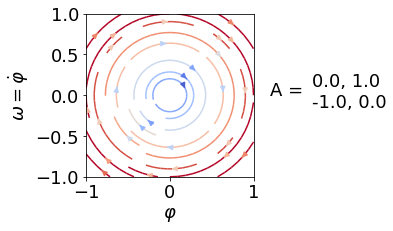

In [99]:
# Plotting phase portraits
def plot_phase_portrait(A,n = 10, xlabel=r'$x_1$', ylabel=r'$x_2$', Alabel='A'):
  '''
    A: matrix 2x2
    n: number of points in the n x n grid
  '''
  plt.figure(figsize=(3,3))
  x1 = np.linspace(-1, 1, n) # a 1D grid
  x = np.array(np.meshgrid(x1, x1)).reshape((2,-1)) # a 2D flattened grid
  # calculate the time-derivative of the state x in the line below
  # the output shape should be [2 x n^2]
  x_dot = A @ x # 2remove
  x_dot = x_dot.reshape((2,n,n))
  plt.streamplot(x1,x1,*x_dot,color=np.linalg.norm(x_dot,axis=0),cmap='coolwarm',density=0.5)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel);
  plt.text(1.2,0,f'{Alabel} = ')
  plt.text(1.7,-.15,f'{A[0,0]:.1f}, {A[0,1]:.1f} \n{A[1,0]:.1f}, {A[1,1]:.1f}')
  plt.xlim([-1,1])
  plt.ylim([-1,1])
  plt.clim(vmin=0,vmax=1)

A = np.array([[0, 1], [-1, 0]]) # pendulum dynamics
plot_phase_portrait(A, xlabel=r'$\varphi$', ylabel=r'$\omega = \dot\varphi$')

Following these streamlines in a figure above from some initial point $x_0$ step-by-step corresponds to integrating $\int_{t_0}^{t} \dot x(t) dt$ that we did in the previous exercise!

Color here shows how fast the state evolves: cooler colors mean slower, warmer colors -- faster!
(darkest blue: $|\mathbf{\dot x}| = 0$, brightest red: $|\mathbf{\dot x}| = 1$)

Like in Izhekevich quote, we don't even need to write equation to tell how the system behaves 🤯

## Analysing multi-dimensional linear dynamical systems

### Change of the basis
The pendulum example above is, perhaps, the simplest linear dynamical system in physics. Its phase portrait is symmetrical!

But for other dynamical systems, with other matrices $A$, this might not be the case:

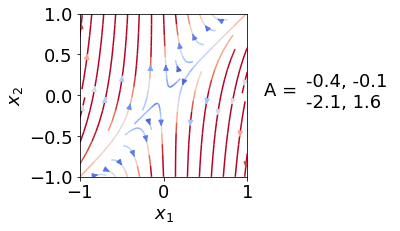

In [106]:
np.random.seed(2)
A = np.random.randn(2,2) # pick some values from N(0,1) for each component

plot_phase_portrait(A)


Looks very assymetric! Can we make it better?

We are now considering an abstract linear dynamical system, so the components $x_1$ and $x_2$ do not mean much... we can then stretch and rotate this space to make the system a little simpler:

In [122]:
S = np.eye(2)
@widgets.interact
def rotate_and_scale(rotate=widgets.FloatSlider(min=-90, max=+90, step=5 ,description='rotate ⤾'),
                     stretch=widgets.FloatLogSlider(min=-1, max=+1, value=1.,description='stretch ↕')):
  global S
  a = rotate * np.pi / 180
  S =  np.array([[np.cos(a),np.sin(a)],[-np.sin(a),np.cos(a)]]) @ np.array([[stretch,0],[0,1]])
  plot_phase_portrait(S @ A @ np.linalg.inv(S),
                      xlabel=r'$\hat{x_1}$', ylabel=r'$\hat{x_2}$', Alabel=r'$\hat{A}$')


interactive(children=(FloatSlider(value=0.0, description='rotate ⤾', max=90.0, min=-90.0, step=5.0), FloatLogS…

In [125]:
S

array([[ 6.21371685,  0.17364818],
       [-1.09564593,  0.98480775]])

What we are doing above corresponds to this transformation:
$$S \mathbf{\dot x} = SA\mathbf{x} = SA\underbrace{(S^{-1}S)}_{I}\mathbf{x} = (SAS^{-1})S\mathbf{x}$$
or, in other words, we make the following change of coordinates (i.e. change of the basis):
$$\mathbf{x} \rightarrow S\mathbf{x} ~$$
$$A \rightarrow SAS^{-1}$$

Did you manage to align the *special* directions in the phase portrait above with the new axes? How does the new, transformed matrix $\hat{A} = SAS^{-1}$ look like?

If something does not look right, check the solution:  LINK!

### Eigenvectors and eigenvalues

#### Real eigenvalues

In your first tutorial, you practiced calculating eigenvectors and eigenvalues. You were writing characteristic polynomial $p(\lambda) = \det(A-\lambda I)$ and finding its roots for eigenvalues and perfroming Gaussian elimination.

What we did above by rotating and stretching our phase space is the transformation of matrix $A$ into its *canonical form*. Everything is simpler in this form! The eigenvalues remain the same under stretching and rotation:

$$\hat{A}\mathbf{\hat{x}} = SA\mathbf{x} = S\lambda x = \lambda \mathbf{\hat{x}}$$

Could you tell what are the eigenvalues of $\hat{A}$ without writing anything down?

Now, check your guess by calculating the eigenvalues:


In [127]:
A_hat = S @ A @ np.linalg.inv(S)
print('Eigenvalues of A    :', np.linalg.eig(A)[0])
print('Eigenvalues of A_hat:', np.linalg.eig(A_hat)[0])

Eigenvalues of A    : [-0.47361843  1.69713139]
Eigenvalues of A_hat: [-0.47361843  1.69713139]


Now let us experiment with the eigenvalues and understand what they *mean* in the dynamical system:

In [105]:
@widgets.interact
def rotate_and_scale(lambda_1=widgets.FloatSlider(min=-1, max=+1, description='λ1'),
                     lambda_2=widgets.FloatSlider(min=-1, max=+1, description='λ2')):
  lambda_1 = lambda_1 if type(lambda_1)==float else lambda_1.value
  lambda_2 = lambda_2 if type(lambda_2)==float else lambda_2.value
  if lambda_1==0 and lambda_2==0:
    lambda_1 = -1e-10
  A_12 = np.array([[lambda_1, 0],
                [0, lambda_2]])
  plot_phase_portrait(A_12)


interactive(children=(FloatSlider(value=0.0, description='λ1', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

Indeed, in a canonical form, the 2D system with two real eigenvalues splits into two independent 1D dynamical systems:
$\dot x_i = \lambda_i x_i, i \in \{0,1\}.$ So, each eigenvalue here changes the dynamics along its eigenvector the same way as the parameter $a$ in Example 1.

The eigenvectors are trivial in the canonical form: they are just aligned with axes!

So, in order to find eigenvectors of the original evolution matrix $A$, we simply need to reverse the rotation and stretching:

In [147]:
A_hat = S @ A @ np.linalg.inv(S)
print('Trivial eigenvectors of A_hat:', np.round(np.linalg.eig(A_hat)[1].T,1))
print('Eigenvectors of A:', np.round(np.linalg.eig(A)[1].T,2))
S_inv = np.linalg.inv(S) # invert the transform
S_inv_norm = S_inv / np.linalg.norm(S_inv,axis=0)
print('Vectors derived from transformation:', np.round(S_inv_norm.T,2))

Trivial eigenvectors of A_hat: [[-1.  0.]
 [-0. -1.]]
Eigenvectors of A: [[-0.7  -0.71]
 [ 0.03 -1.  ]]
Vectors derived from transformation: [[ 0.67  0.74]
 [-0.03  1.  ]]


The above vectors should be the almost identical (up to a sign).

#### Complex eigenvalues

Let us return 

In [143]:
0.71**2 + 1**2

1.5041

### Summary

## **Exercise 3**: relationship between continuous time and discrete time linear dynamical systems

Suppose we know the state $x(0)$ of a continuous-time dynamical system and we want to know what happens next. To figure this out, we need to integrate a continuous-time dynamical system equation over time.

## Part 1 objectives

1. Learn what linear systems can and can not do
2. Learn what fixed points are (and relevance to neuroscience inf processing, categorization, filtering noise, memorization)
3. Read eignespectra

# Part 1¾: Line attractor

![Platform 9¾](https://www.partsnotincluded.com/wp-content/uploads/2019/12/P934KC_Reference_Semi-Crop.jpg)

In Part 1 of this tutorial we have found all of the possible regimes a linear dynamical systems can have. Although, we only looked at a full rank matrices $A$: such matrices that have all non-zero eigenvectors. What if one of them is actually zero?



# Part 2: Nonlinear dynamical systems

### Fitzhugh-Nagumo model of a spiking neuron

Yesterday you have run simulations of a biophysically accurate neuron models with a Hodgkin-Huxley equation (HH). To recap, the set of HH equations contained the following 4 equations:

$$C \frac{dV}{dt} = -\bar g_K n^4 (V - V_K) - \bar g_{Na} m^3 h(V-V_{Na}) - \bar g_l (V - V_l) + I_{ext}\tag{4a}$$

$$\frac{dn}{dt} = \alpha_n(V)(1-n) - \beta_n(V) n\tag{4b}$$
$$\frac{dm}{dt} = \alpha_m(V)(1-m) - \beta_m(V) m\tag{4c}$$
$$\frac{dh}{dt} = \alpha_h(V)(1-h) - \beta_h(V) h\tag{4d}$$

The state space of this model is 4D, which is too much for visualization and analyse.
However, not all equations here are equally important. 

Similarly to the linear attractor example above, some of the timescales differ so much that the dynamics along some dimensions can be ignored. Indeed, while voltage $V$ and sodium channel activation $m$ change on a scale of a single spike ($<$1ms), both sodium channel inactivation $h$ and potassium channel gating $n$ change considerably slower (on a scale of 5-10ms). Thus, we can assume that both $h$ and $n$ do not change much and reduce the set of equations (4a-4d) to just 2 equations: 
<!-- 1. Activation gate of the sodium channel is much faster than any other processes in eq. (4a-4d), so we can assume that equation (4c) always reaches equilibrium and $dm/dt=0$.
2. At the same time inactivation gate is changing on the scale much greater than a few spikes, so the eq. (4d) does not change much and $h$ can be assumed constant. IS IT THOUGH???  -->

These two assumptions allows us to reduce the system to just 2 equations:
$$C \frac{dV}{dt} = -\hat g_K (V - V_K) - \hat g_{Na} m^3 (V-V_{Na}) - \bar g_l (V - V_l) + I_{ext}\tag{4a}$$
$$\frac{dm}{dt} = \alpha(V)(1-m) - \beta(V) m\tag{4b}$$


Hodgkin Huxley -> simplify

Nullclines

Phase portrait

# References

## Papers
1. Izhikevich, Eugene M. [Dynamical systems in neuroscience.](https://www.izhikevich.org/publications/dsn.pdf) MIT press, 2007.

<!-- ## Other great tutorials: -->
2. Linear dynamical systems by Bing Wen Brunton and Alice Schwarze [Neuromatch: W2D2](https://compneuro.neuromatch.io/tutorials/W2D2_LinearSystems/student/W2D2_Tutorial1.html)